# Lab 1: Playing with Google Trends


The goal of this lab is collecting Google Trends data using [PyTrends](https://pypi.org/project/pytrends/).

This lab is written by Dr. Jisun AN (jisunan@smu.edu.sg) and Dr. Haewoon KWAK (hkwak@smu.edu.sg).

# Install

In [1]:
# !pip install pytrends

In [2]:
# !pip3 install matplotlib

In [3]:
# !pip3 install plotly

In [4]:
# !pip3 install seaborn


In [5]:
# !conda install --yes pandas

In [6]:
# !conda install --yes seaborn

In [7]:
# import sys
# sys.executable

In [11]:
import pandas as pd

# Set logger

The [Python Logging](https://docs.python.org/3/library/logging.html) module allows us to know what's happening in the 3rd party library.

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
                    datefmt='%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

The above code imports the logging module and calls the `basicConfig` method which does basic configuration for the logging system. The `format` string argument defines the format of the logger output with the following [LogRecord attributes](https://docs.python.org/3/library/logging.html#logrecord-attributes):

|Attribute name|Format|Description|
|:----|:-----:|:----|
|asctime|%(asctime)s|Human-readable time when the LogRecord was created.|
|name|%(name)s|Name of the logger used to log the call.|
|levelname|%(levelname)s|Text logging level for the message ('DEBUG', 'INFO', 'WARNING', 'ERROR', 'CRITICAL').|
|message|%(message)s|The logged message, computed as msg % args. This is set when [Formatter.format()](https://docs.python.org/3/library/logging.html#logging.Formatter.format) is invoked.|

Below is a sample output of the logger stating that a HTTP request has been successfully completed (ie. [response status code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) 200):
<img align="center" src="https://docs.google.com/uc?id=1VrpE6JCuzWNHcjMnJBdcjw7IXEViigZE"  style="height: 55px;"/>



# Connect to Google

Language = en-US, timezone (Singapore) = -480 (according to Google's convention)

In [36]:
import pytrends
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=-480)

# Collect the Google Trends query's response using Pytrends

We collect all the data that is accessible through the web interface, which is:

1. Interest over time
2. Interest by city (region)
3. Related topics
4. Related queries

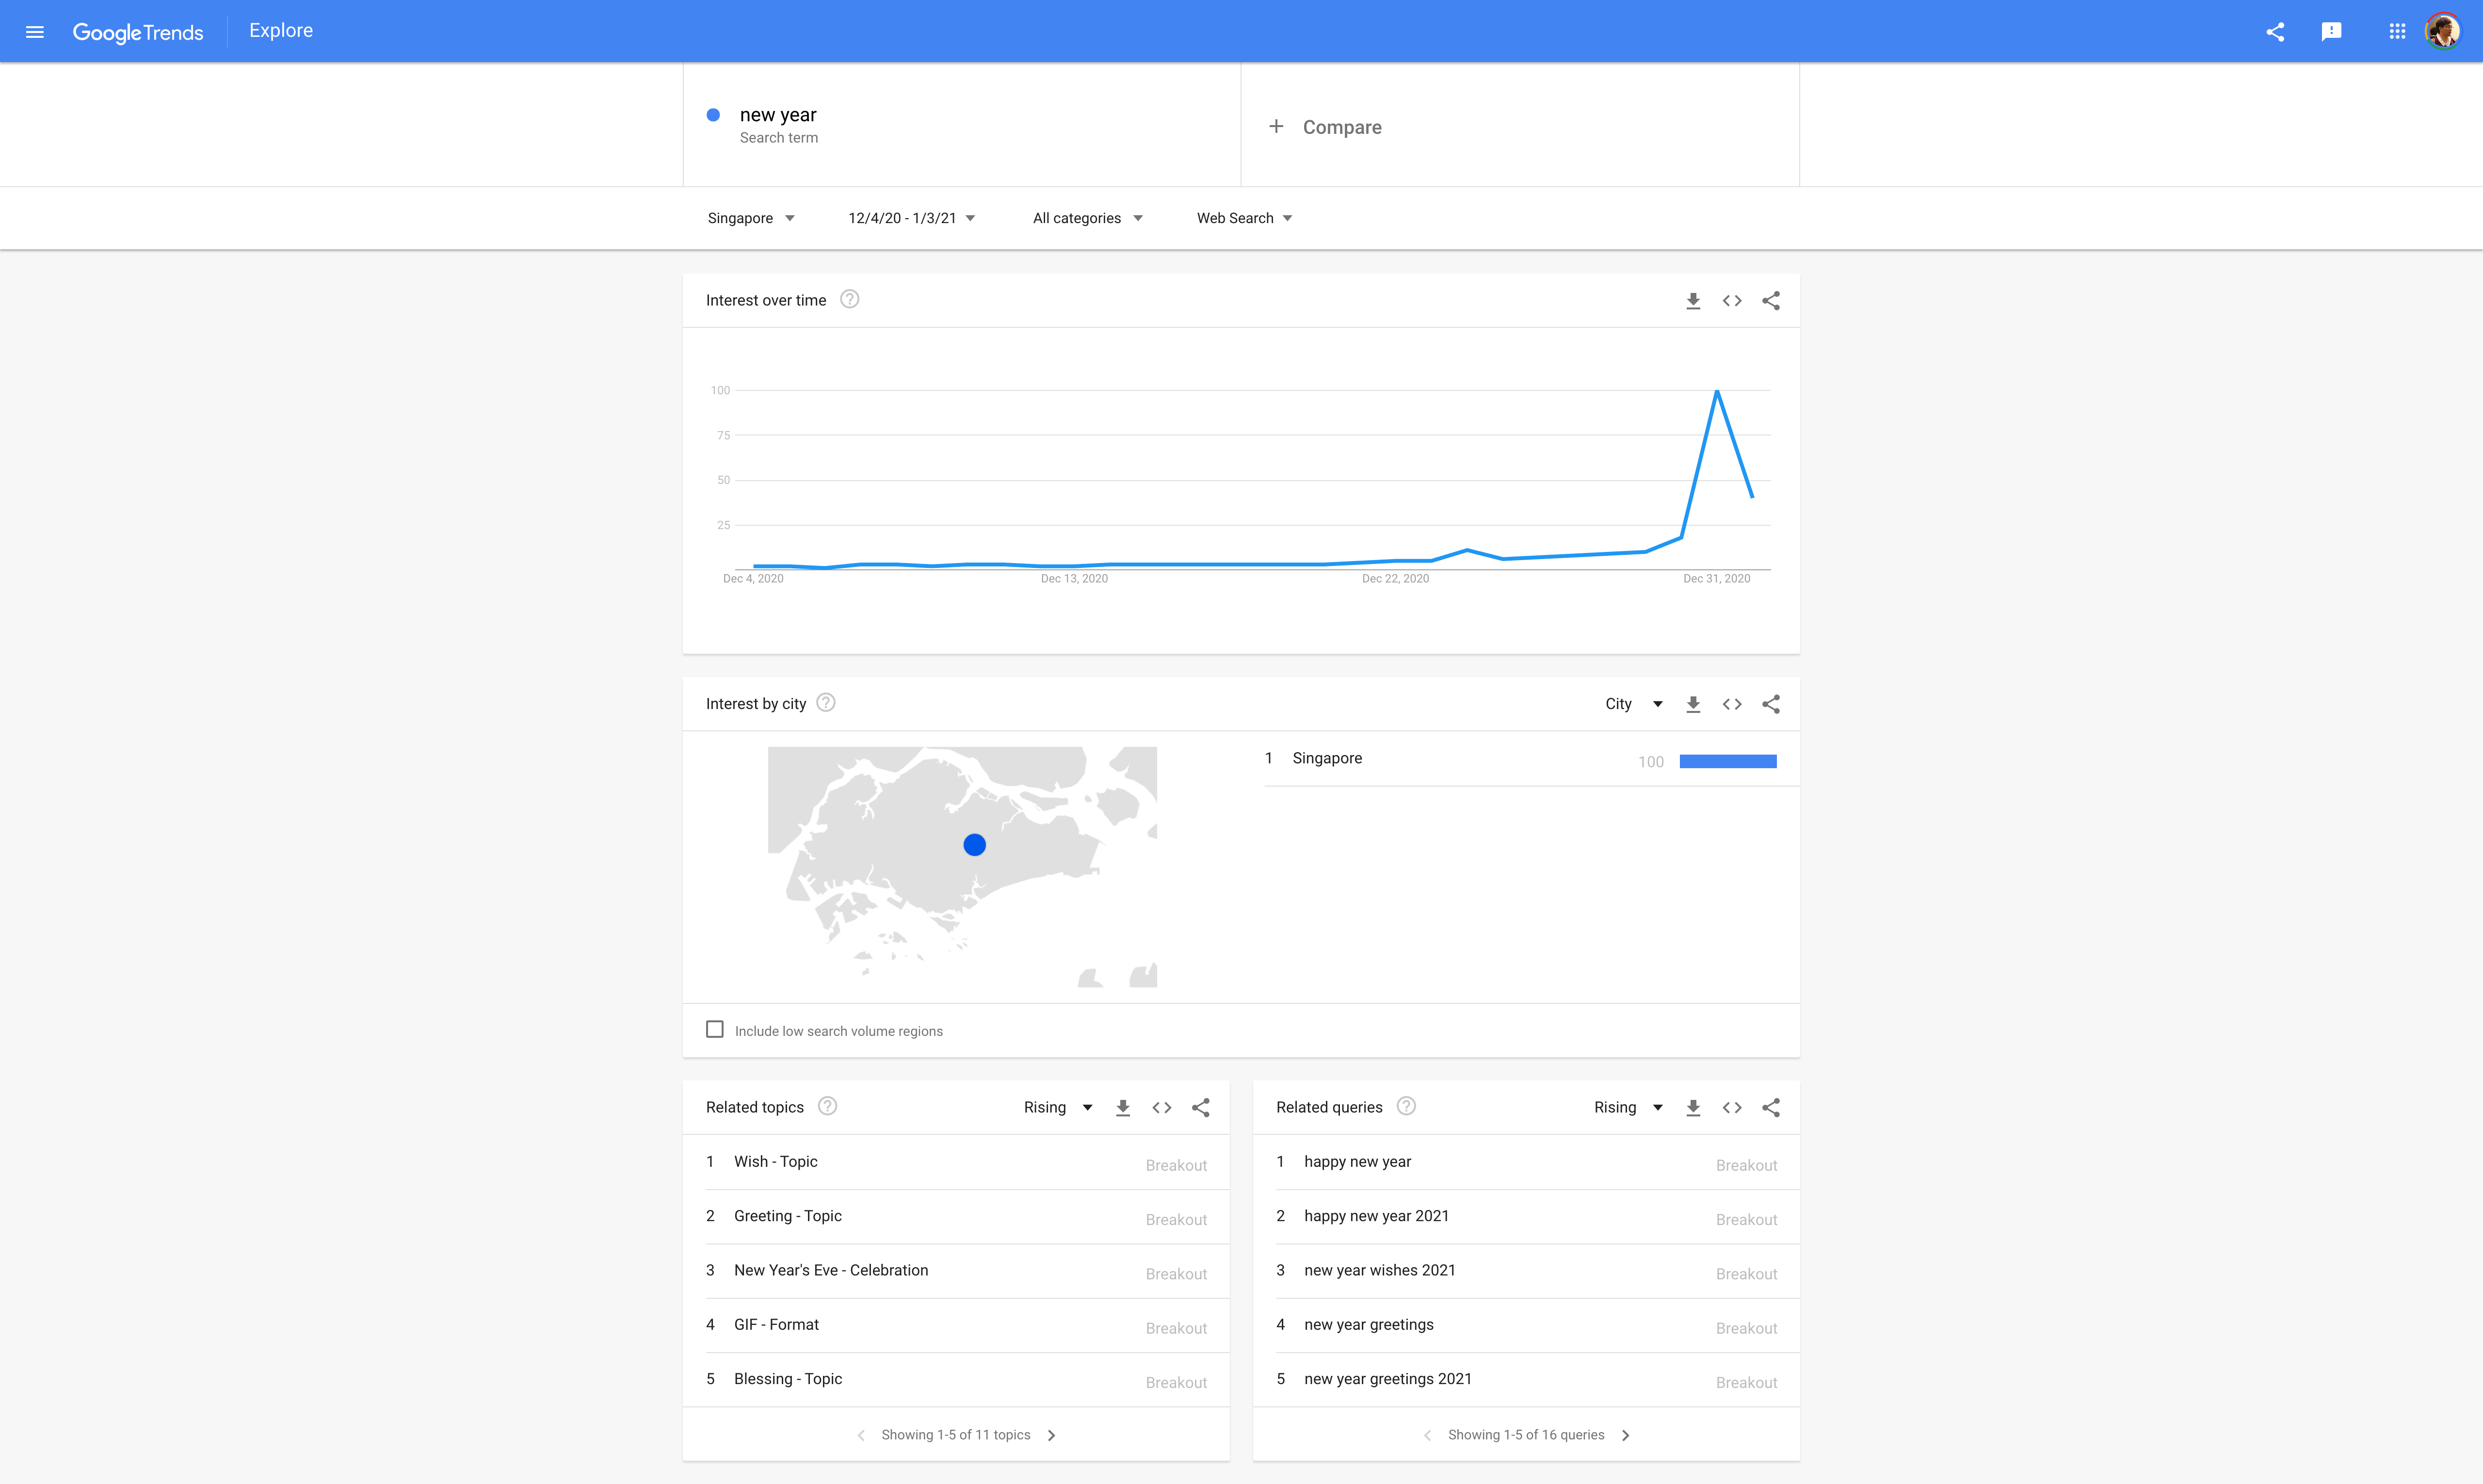

https://trends.google.com/trends/explore?date=2020-12-04%202021-01-03&geo=SG&q=new%20year&hl=en

## Setting common parameters

In [3]:
keywords = ["new year"]
pytrends.build_payload(keywords, geo='SG', timeframe='2019-12-04 2021-01-03', cat=0)

03-19 18:09:15 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
03-19 18:09:15 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/explore?hl=en-US&tz=-480&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22new+year%22%2C+%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22geo%22%3A+%22SG%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D HTTP/1.1" 200 None


## 1. Interest over time

In [20]:
df = pytrends.interest_over_time()
df.head(n=10)


03-19 18:15:24 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
03-19 18:15:24 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-US%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22country%22%3A+%22SG%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22new+year%22%7D%5D%7D%7D%5D%2C+%22requestOptions%22%3A+%7B%22property%22%3A+%22%22%2C+%22backend%22%3A+%22IZG%22%2C+%22category%22%3A+0%7D%7D&token=APP6_UEAAAAAYFXJywYsLAnC5kY9LvzzikV1C7WXJhbu&tz=-480 HTTP/1.1" 200 None


,new year,isPartial
date,,
2019-12-08,11,False
2019-12-15,14,False
2019-12-22,24,False
2019-12-29,94,False
2020-01-05,29,False
2020-01-12,31,False
2020-01-19,100,False
2020-01-26,26,False
2020-02-02,9,False


In [18]:
df.to_csv('1-over-time.csv') #save to file because some APIs do not allow multiple queries in a short time

## Let's plot

In [19]:
df = pd.read_csv('1-over-time.csv')
df.head()

,Unnamed: 0,date,new year,isPartial
0,0,2019-12-08,11,False
1,1,2019-12-15,14,False
2,2,2019-12-22,24,False
3,3,2019-12-29,94,False
4,4,2020-01-05,29,False


### To draw a plot, we need to reset the index of dataframe as it's multilevel

In [21]:
# reset_index() -- Reset the index of the DataFrame, and use the default one instead. 
# If the DataFrame has a MultiIndex, this method can remove one or more levels.
df.reset_index(inplace=True)
df.head(n=10)


,date,new year,isPartial
0,2019-12-08,11,False
1,2019-12-15,14,False
2,2019-12-22,24,False
3,2019-12-29,94,False
4,2020-01-05,29,False
5,2020-01-12,31,False
6,2020-01-19,100,False
7,2020-01-26,26,False
8,2020-02-02,9,False
9,2020-02-09,4,False


### Backup data -- Use below codes if Google blocked our IP

#### You can comment out all codes by select Ctrl+A and Ctrl+/ for Window or  Cmd+A and Cmd+/  for Mac

In [14]:
# # Our IP may be temporally blocked by Google as we send too many queries at once.
# # For that case, we have a backup data.

# import pandas as pd # add pandas library to the notebook
# df = pd.read_csv('backup-1-over-time.csv')
# df.head()

### Plotly is a python library for interactive visualization of data

See more charts examples here in the below link.
Plotly for python: https://plotly.com/python/ 


In [22]:
import plotly.express as px # add library to the notebook!

In [23]:
fig = px.line(df, x="date", y="new year", title='New Year popularity in Google Search')
fig.show()


### Exercise 1. Change the country from Singapore to other 3 countries that you are curious

The ISO-2 country code is available via https://en.wikipedia.org/wiki/ISO_3166-2#:~:text=It%20was%20first%20published%20in,form%20than%20their%20full%20names.

Don't forget to change XX, YY, and ZZ in the filename into your country names.

In [17]:
keywords = ["new year"]

In [25]:
pytrends.build_payload(keywords, geo='CN', timeframe='2019-12-04 2021-01-03', cat=0)
df1 = pytrends.interest_over_time()

df1.to_csv('1-1-CN.csv')
df1.reset_index(inplace=True)
fig1 = px.line(df1, x="date", y="new year", title='New Year popularity in Google Search China')
fig1.show()

03-19 18:17:59 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
03-19 18:17:59 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/explore?hl=en-US&tz=-480&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22new+year%22%2C+%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22geo%22%3A+%22CN%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D HTTP/1.1" 200 None
03-19 18:17:59 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
03-19 18:17:59 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-US%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22country%22%3A+%22CN%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22new+year%22%7D%5D%7D%7D%5D%2C+%22req

In [19]:
pytrends.build_payload(keywords, geo='ES', timeframe='2019-12-04 2021-01-03', cat=0)
df2 = pytrends.interest_over_time()

df2.to_csv('1-2-ES.csv')
df2.reset_index(inplace=True)
fig2 = px.line(df2, x="date", y="new year", title='New Year popularity in Google Search Spain')
fig2.show()

01-24 20:56:14 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
01-24 20:56:14 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/explore?hl=en-US&tz=-480&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22new+year%22%2C+%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22geo%22%3A+%22ES%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D HTTP/1.1" 200 None
01-24 20:56:14 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
01-24 20:56:14 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-US%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22country%22%3A+%22ES%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22new+year%22%7D%5D%7D%7D%5D%2C+%22req

In [20]:
pytrends.build_payload(keywords, geo='IS', timeframe='2019-12-04 2021-01-03', cat=0)
df3 = pytrends.interest_over_time()

df3.to_csv('1-3-IS.csv')
df3.reset_index(inplace=True)
fig3 = px.line(df3, x="date", y="new year", title='New Year popularity in Google Search Iceland')
fig3.show()

01-24 20:56:14 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
01-24 20:56:14 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/explore?hl=en-US&tz=-480&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22new+year%22%2C+%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22geo%22%3A+%22IS%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D HTTP/1.1" 200 None
01-24 20:56:14 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): trends.google.com:443
01-24 20:56:14 urllib3.connectionpool DEBUG    https://trends.google.com:443 "GET /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222019-12-04+2021-01-03%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-US%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22country%22%3A+%22IS%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22new+year%22%7D%5D%7D%7D%5D%2C+%22req

## 2. Interest by city

Unfortunately, Google does not provide a fine-grained subregion view for Singapore.
Let's try with Australia.

In [44]:
keywords = ["new year"]
pytrends.build_payload(keywords, geo='AU', timeframe='2000-12-04 2021-01-03', cat=0)

In [45]:
df4 = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
df4.head()

,new year
geoName,
Adelaide,74
Brisbane,71
Cairns,72
Canberra,76
Central Coast,65


In [46]:
df4.to_csv('2-by-region.csv')

### Backup data -- Use below code if Google blocked our IP

In [24]:
# df = pd.read_csv("backup-2-by-region.csv")
# df.head()

### Let's plot using Matplotlit, another python library for visualiation!


In [47]:
import matplotlib.pyplot as plt

In [34]:
# it seems that matplotlib prints many DEBUG messages. Let's change it to print logs when having ERRORs
logging.getLogger().setLevel(logging.ERROR)

In [48]:
# reset_index() -- Reset the index of the DataFrame, and use the default one instead. 
# If the DataFrame has a MultiIndex, this method can remove one or more levels.
df4.reset_index(inplace=True)
df4.head()

,geoName,new year
0,Adelaide,74
1,Brisbane,71
2,Cairns,72
3,Canberra,76
4,Central Coast,65


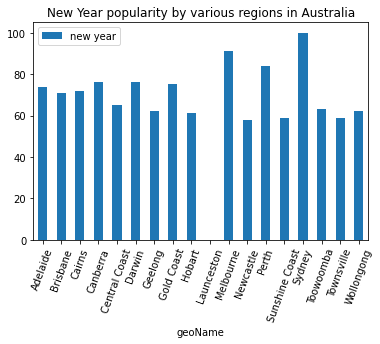

In [54]:
df4.plot.bar(x="geoName", y="new year", rot=70, title="New Year popularity by various regions in Australia")

plt.show(block=True)

see more example for bar chart: https://pythontic.com/pandas/dataframe-plotting/bar%20chart

## Exercise 2. Read the API doc and try different resolution

Check https://github.com/GeneralMills/pytrends#interest-by-region and try other resolution by changing XX to other options.

In [70]:
df = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
df.head()

,new year
geoName,
Adelaide,73
Brisbane,68
Cairns,77
Canberra,75
Central Coast,65


### Bugs
You might realize that PyTrends does not support the city-level data for AU. When the `resolution` parameter is set as `CITY`, you will observe that the data returned is region-specific instead of city-specific which is incorrect.

It is because of the following source code in the Pytrends library. 

    # make the request
    region_payload = dict()
    if self.geo == '':
        self.interest_by_region_widget['request']['resolution'] = resolution
    elif self.geo == 'US' and resolution in ['DMA', 'CITY', 'REGION']:
        self.interest_by_region_widget['request']['resolution'] = resolution

See https://github.com/GeneralMills/pytrends/blob/master/pytrends/request.py#L273

From the above code, it is clear that the passing `resolution` parameter is not assigned to self when geo is neither '' nor 'US'.<br/>
Since geo == 'AU' in our setting, the code does not show the 'CITY' result.<br>
And thus, we fixed the code and uploaded at https://github.com/haewoon/pytrends. <br/>

If you wish to retrieve city-level data for AU, carry out the following steps: 
1. Download the 'pytrends' folder from the above github link <img align="center" src="https://docs.google.com/uc?id=1Vqi2cFkLFLCxWIJMtdD4MHC9ji4BfclG"  style="height: 250px;"/>
2. Place the 'pytrends' folder in the same folder as the current python notebook file. 
3. Go to Jupyter Notebook menu, select Kernel -> select Restart option to restart the notebook kernel (explanation: by restarting the kernel, the current notebook will be able to recognize the presence of the newly added 'pytrends' folder)
4. Rerun the `interest_by_region` API call by setting `resolution` as `CITY`

You should now observe that city-level data for AU is displayed as the `pytrends.interest_by_region` now uses the source code found in the newly added 'pytrends' folder instead of the standard 'pytrends' standard library.


In [31]:
# save the resolution data into a csv file
df.to_csv('2-by-XX.csv')

## 3. Related topics
Okay. Back to Singapore. 
Users searching for a search term (here 'new year') also searched for these topics. 

Google Trends provide two options:
* Top - The most popular topics. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Related topics with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these topics are new and had few (if any) prior searches.

In [55]:
keywords = ["new year"]
pytrends.build_payload(keywords, geo='SG', timeframe='2020-12-04 2021-01-03', cat=0)

In [56]:
related_topics = pytrends.related_topics()

In [57]:
# let's take a look at the output
related_topics


{'new year': {'rising':      value formattedValue                                               link  \
  0   293050       Breakout  /trends/explore?q=/m/02q2qc&date=2020-12-04+20...   
  1   192500       Breakout  /trends/explore?q=/m/01pl3y&date=2020-12-04+20...   
  2   192050       Breakout  /trends/explore?q=/m/03bfb&date=2020-12-04+202...   
  3    90550       Breakout  /trends/explore?q=/m/02cgn0&date=2020-12-04+20...   
  4    53850       Breakout  /trends/explore?q=/m/015h7g&date=2020-12-04+20...   
  5    27100       Breakout  /trends/explore?q=/m/012y04&date=2020-12-04+20...   
  6    27100       Breakout  /trends/explore?q=/m/0nh3sq1&date=2020-12-04+2...   
  7    26750       Breakout  /trends/explore?q=/m/0hrfwlf&date=2020-12-04+2...   
  8    26700       Breakout  /trends/explore?q=/m/02pc5gy&date=2020-12-04+2...   
  9     1850        +1,850%  /trends/explore?q=/m/03d99d&date=2020-12-04+20...   
  10     500          +500%  /trends/explore?q=/m/0g6b5&date=2020-12-04+202.

In [58]:
# let's check what's the data type of the output
type(related_topics)
# This is a dictionary of dictionaries
# The outer dictionary key is the keyword. The inner dict keys are 'rising' and 'top' and their values are a single dataframe

dict

### Backup data -- Use below code if Google blocked our IP

In [36]:
# import pickle
# filename = 'backup-3-related-topics.pickle'
# infile = open(filename,'rb')
# related_topics = pickle.load(infile)
# infile.close()
# print(type(related_topics))
# related_topics


### Access to top related topics

In [37]:
related_topics['new year']['top']

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05fdr&date=2020-12-04+202...,/m/05fdr,New Year,Topic
1,61,61,True,/trends/explore?q=/g/11b77d6b6f&date=2020-12-0...,/g/11b77d6b6f,2021,Topic
2,34,34,True,/trends/explore?q=/m/012m47&date=2020-12-04+20...,/m/012m47,Chinese New Year,Festivity
3,19,19,True,/trends/explore?q=/m/03d99d&date=2020-12-04+20...,/m/03d99d,Wish,Topic
4,13,13,True,/trends/explore?q=/m/02q2qc&date=2020-12-04+20...,/m/02q2qc,Greeting,Topic
5,7,7,True,/trends/explore?q=/m/0g6b5&date=2020-12-04+202...,/m/0g6b5,Fireworks,Topic
6,6,6,True,/trends/explore?q=/m/01pl3y&date=2020-12-04+20...,/m/01pl3y,New Year's Eve,Celebration
7,6,6,True,/trends/explore?q=/m/03bfb&date=2020-12-04+202...,/m/03bfb,GIF,Format
8,3,3,True,/trends/explore?q=/m/01xns6&date=2020-12-04+20...,/m/01xns6,Blessing,Topic
9,2,2,True,/trends/explore?q=/m/02cgn0&date=2020-12-04+20...,/m/02cgn0,Countdown,Topic


### Access to rising related topics

In [38]:
related_topics['new year']['rising']

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,716600,Breakout,/trends/explore?q=/m/03d99d&date=2020-12-04+20...,/m/03d99d,Wish,Topic
1,217000,Breakout,/trends/explore?q=/m/03bfb&date=2020-12-04+202...,/m/03bfb,GIF,Format
2,112800,Breakout,/trends/explore?q=/m/01xns6&date=2020-12-04+20...,/m/01xns6,Blessing,Topic
3,94200,Breakout,/trends/explore?q=/m/02cgn0&date=2020-12-04+20...,/m/02cgn0,Countdown,Topic
4,86900,Breakout,/trends/explore?q=/m/0g52jn4&date=2020-12-04+2...,/m/0g52jn4,Message,Topic
5,69500,Breakout,/trends/explore?q=/m/015h7g&date=2020-12-04+20...,/m/015h7g,New Year's Day,Feast day
6,43050,Breakout,/trends/explore?q=/m/05_4_&date=2020-12-04+202...,/m/05_4_,Party,Topic
7,34850,Breakout,/trends/explore?q=/g/11b77qrp3l&date=2020-12-0...,/g/11b77qrp3l,2022,Topic
8,34650,Breakout,/trends/explore?q=/m/09pglz&date=2020-12-04+20...,/m/09pglz,Reunion dinner,Topic
9,25900,Breakout,/trends/explore?q=/m/012y04&date=2020-12-04+20...,/m/012y04,Japanese New Year,Festivity


In [62]:
related_topics

[1, 2, 3]

## Exercise 3. Compare related topics between different periods.

Related topics are also changing over time.
Compare related topics of 'covid-19' in the **United Kingdom** (1) between 2020/11/1 and 2020/12/1 with (2) between 2020/12/1 and 2021/1/1.

Tip: United Kingdom's code is not UK.


In [64]:
keywords = ["covid-19"]
pytrends.build_payload(keywords, geo='GB', timeframe='2020-11-01 2020-12-01', cat=0)

In [65]:
related_topics = pytrends.related_topics()
related_topics['covid-19']['rising']

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,13600,Breakout,/trends/explore?q=/m/080gm&date=2020-11-01+202...,/m/080gm,Volunteering,Topic
1,13500,Breakout,/trends/explore?q=/m/0gvbw&date=2020-11-01+202...,/m/0gvbw,Pfizer,Pharmaceutical company
2,13450,Breakout,/trends/explore?q=/m/0119h9rd&date=2020-11-01+...,/m/0119h9rd,Rapid diagnostic test,Topic
3,13250,Breakout,/trends/explore?q=/m/02gshc&date=2020-11-01+20...,/m/02gshc,Immunoglobulin M,Topic
4,13250,Breakout,/trends/explore?q=/g/11f01zmz1r&date=2020-11-0...,/g/11f01zmz1r,BioNTech SE,Biotechnology company
5,6700,Breakout,/trends/explore?q=/m/01g0zx&date=2020-11-01+20...,/m/01g0zx,Risk assessment,Topic
6,6700,Breakout,/trends/explore?q=/m/0v5r&date=2020-11-01+2020...,/m/0v5r,Antigen,Topic
7,6700,Breakout,/trends/explore?q=/g/11cl_5ggqj&date=2020-11-0...,/g/11cl_5ggqj,Our World in Data,Topic
8,6700,Breakout,/trends/explore?q=/m/025sjz4&date=2020-11-01+2...,/m/025sjz4,Immunity,Topic
9,80,+80%,/trends/explore?q=/m/0ytw&date=2020-11-01+2020...,/m/0ytw,Antibody,Drug class


In [66]:
keywords = ["covid-19"]
pytrends.build_payload(keywords, geo='GB', timeframe='2020-12-01 2021-1-01', cat=0)

In [67]:
related_topics1 = pytrends.related_topics()
related_topics1['covid-19']['rising']

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,44550,Breakout,/trends/explore?q=/m/040499&date=2020-12-01+20...,/m/040499,Strain,Biology
1,19400,Breakout,/trends/explore?q=/m/01fl8h&date=2020-12-01+20...,/m/01fl8h,Capitalization,Topic
2,19000,Breakout,/trends/explore?q=/m/06fbf&date=2020-12-01+202...,/m/06fbf,RNA,Topic
3,12900,Breakout,/trends/explore?q=/g/11j2xhhftr&date=2020-12-0...,/g/11j2xhhftr,RNA vaccine,Vaccine
4,6300,Breakout,/trends/explore?q=/m/03131m&date=2020-12-01+20...,/m/03131m,Injection,Topic
5,1000,"+1,000%",/trends/explore?q=/m/0fq2vx0&date=2020-12-01+2...,/m/0fq2vx0,Pfizer Ltd,Pharmaceutical company
6,500,+500%,/trends/explore?q=/m/028hfb&date=2020-12-01+20...,/m/028hfb,Patient,Topic
7,250,+250%,/trends/explore?q=/m/0gvbw&date=2020-12-01+202...,/m/0gvbw,Pfizer,Pharmaceutical company
8,90,+90%,/trends/explore?q=/m/05w_j&date=2020-12-01+202...,/m/05w_j,Polymerase chain reaction,Medical test
9,70,+70%,/trends/explore?q=/m/07__7&date=2020-12-01+202...,/m/07__7,Vaccine,Topic


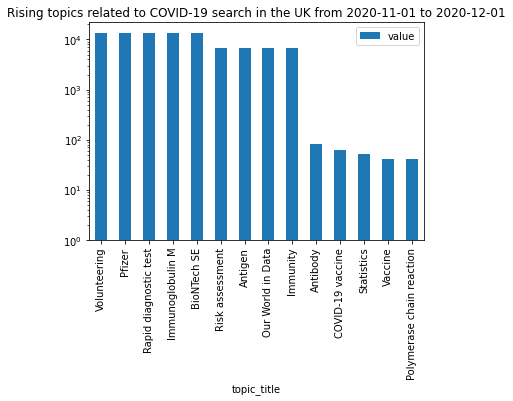

In [74]:
related_topics['covid-19']['rising'].plot.bar(x="topic_title", y="value", log=True, title="Rising topics related to COVID-19 search in the UK from 2020-11-01 to 2020-12-01")

plt.show(block=True)

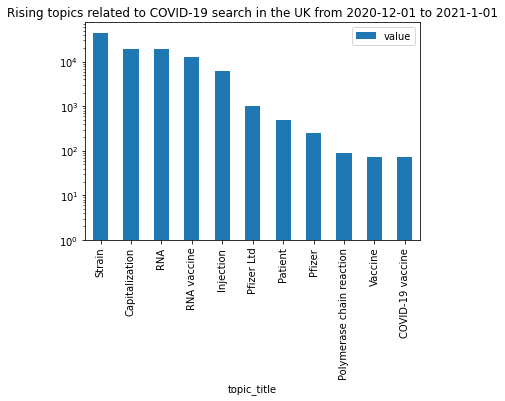

In [75]:
related_topics1['covid-19']['rising'].plot.bar(x="topic_title", y="value", log=True, title="Rising topics related to COVID-19 search in the UK from 2020-12-01 to 2021-1-01")

plt.show(block=True)

## 4. Related queries

Users searching for a term (here 'new year') also searched for these queries. 

Similarly, Google provides two options:
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* Rising - Queries with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these queries are new and had few (if any) prior searches.

In [43]:
keywords = ["new year"]
pytrends.build_payload(keywords, geo='SG', timeframe='2020-12-04 2021-01-03', cat=0)

In [44]:
related_queries = pytrends.related_queries()

In [45]:
# let's take a look at the output
related_queries

{'new year': {'top':                                       query  value
  0                             new year 2021    100
  1                          chinese new year     55
  2                            happy new year     49
  3                     2021 chinese new year     46
  4                       happy new year 2021     32
  5                           new year wishes     22
  6                        new year greetings     19
  7                      2021 new year wishes     17
  8                   new year greetings 2021     13
  9                     happy new year wishes     12
  10               happy new year wishes 2021     11
  11                  new year fireworks 2021      5
  12       merry christmas and happy new year      5
  13        singapore new year fireworks 2021      5
  14          chinese new year 2021 singapore      4
  15                          new year quotes      4
  16                       new year countdown      4
  17                  happy

### Backup data -- Use below code if Google blocked our IP

In [46]:
# import pickle
# filename = 'backup-4-related-queries.pickle'
# infile = open(filename,'rb')
# related_queries = pickle.load(infile)
# infile.close()
# print(type(related_queries))
# related_queries

### Access to top related queries

In [47]:
related_queries['new year']['top']

,query,value
0,new year 2021,100
1,chinese new year,55
2,happy new year,49
3,2021 chinese new year,46
4,happy new year 2021,32
5,new year wishes,22
6,new year greetings,19
7,2021 new year wishes,17
8,new year greetings 2021,13
9,happy new year wishes,12


### Access to rising related queries

In [48]:
related_queries['new year']['rising']

,query,value
0,happy new year,1138150
1,happy new year 2021,738800
2,2021 new year wishes,394600
3,new year greetings 2021,313100
4,happy new year wishes,269450
5,happy new year wishes 2021,252850
6,merry christmas and happy new year,107100
7,new year quotes,89550
8,new year countdown,89000
9,happy new year 2021 gif,80300


## Exercise 4. Compare related queries between different periods.

Related queries are also changing over time.
Compare related queries of 'covid-19' in the **United States** (1) between 2020/11/1 and 2020/12/1 with (2) between 2020/12/1 and 2021/1/1


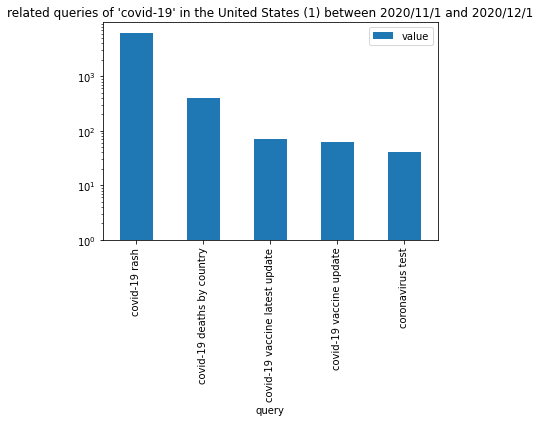

In [80]:
keywords = ["covid-19"]
pytrends.build_payload(keywords, geo='GB', timeframe='2020-11-01 2020-12-01', cat=0)
related_queries = pytrends.related_queries()
related_queries['covid-19']['rising']
related_queries['covid-19']['rising'].plot.bar(x="query", y="value", log=True, title="related queries of 'covid-19' in the United States (1) between 2020/11/1 and 2020/12/1")
plt.show(block=True)

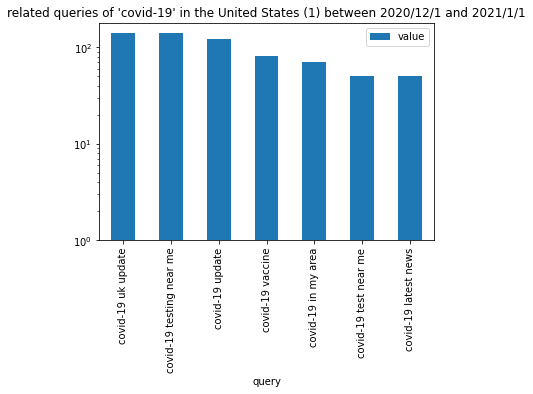

In [81]:
keywords = ["covid-19"]
pytrends.build_payload(keywords, geo='GB', timeframe='2020-12-01 2021-1-01', cat=0)
related_queries = pytrends.related_queries()
related_queries['covid-19']['rising']
related_queries['covid-19']['rising'].plot.bar(x="query", y="value", log=True, title="related queries of 'covid-19' in the United States (1) between 2020/12/1 and 2021/1/1")
plt.show(block=True)